## Exploratory Analysis

In [1]:
import pandas as pd
df = pd.read_csv("data/dataset.csv")
df.head()

,Quarter,Estimate Type,Predicted Value,Real Value,Company,Analyst,Bank,Market Cap,Sector,Start Date,Horizon,Revision Time
0,Q1 2013,Stock Price,1.776711e+02,1.891664e+02,Company18,Analyst27,JP Morgan,Small Cap,Consumer Goods,2013-01-04,Q1,Rev 2013-01-31
1,Q1 2013,Stock Price,1.762390e+02,1.891664e+02,Company18,Analyst27,Goldman Sachs,Small Cap,Consumer Goods,2013-01-04,Q2,Rev 2013-01-31
2,Q1 2013,EBITDA,6.454219e+08,5.548837e+08,Company18,Analyst27,Citi,Small Cap,Consumer Goods,2013-01-04,Q0,Rev 2013-01-31
3,Q1 2013,EBITDA,5.364906e+08,5.548837e+08,Company18,Analyst27,Morgan Stanley,Small Cap,Consumer Goods,2013-01-04,Q1,Rev 2013-01-31
4,Q1 2013,EBITDA,6.186010e+08,5.548837e+08,Company18,Analyst27,Citi,Small Cap,Consumer Goods,2013-01-04,Q2,Rev 2013-01-31


## Variables Explained

- **Quarter**:  The target period for the forecast, defined by the calendar quarter‐end date. Formatted as `Q<quarter_number> <year>` (e.g. `Q1 2013` = the quarter ending in March 2013). Represents the “anchor” date at which we judge the accuracy of any forecast.
- **Estimate Type**: Which metric is being forecast (one of “Stock Price”, “EBITDA”, “EPS”, “Revenue”, “EBIT”).
- **Predicted Value**: The value the analyst predicts for that metric at the specified horizon.
- **Real Value**: The actual (simulated) value of the metric when the horizon arrives.
- **Company**: Identifier for the company being forecast (e.g. `Company18`).
- **Analyst**: Identifier for the analyst who made the prediction (e.g. `Analyst27`).
- **Bank**: The institution the analyst is affiliated with.
- **Market Cap**: The company’s market‐cap category (“Large Cap”, “Mid Cap”, or “Small Cap”).
- **Sector**: The industry sector of the company.
- **Start Date**: The date the analyst began covering that company.
- **Horizon**: How far into the future the analyst is predicting, relative to the **Quarter** anchor:  
    - `Q0`: the forecast for the metric _at_ the quarter‐end itself  
    - `Q1`: the forecast for one quarter _after_ the quarter‐end  
    - `Q2`: the forecast for two quarters _after_ the quarter‐end  
  - Example: if `Quarter = Q2 2020` and `Horizon = Q1`, the analyst is predicting the value at the end of Q3 2020.
- **Revision Time**: - The actual calendar date when that forecast was issued (i.e. when the analyst “revised” their number).  
  - Formatted as `Rev YYYY‑MM‑DD`.  
  - In our simulation each quarter generates up to three revision points, one each at roughly 3, 2, and 1 months before the quarter‐end:  
    - `Rev 2013‑01‑31` for Q1 2013 might be the “one‐month‐out” revision  
    - `Rev 2012‑12‑31` two months before, etc.  
  - Allows us to see _when_ in the lead‐up to the quarter the analyst updated their view.

## Concrete Example: Q3 2021 Forecasts

Imagine we're an analyst issuing three rounds of forecasts for **Quarter = Q3 2021** (July–September 2021).  We produce “revision” updates at three points—3 months, 2 months, and 1 month before quarter‑end—and for each update we issue three horizons:

| Revision Time    | Calendar Date | Horizon | Target Period    | Meaning                                      |
|------------------|---------------|:-------:|------------------|----------------------------------------------|
| **Rev 3 months** | 2021‑07‑01    | **Q0**  | Jul–Sep 2021     | Now‑cast: estimate of the quarter in progress (Q3 2021) |
|                  |               | **Q1**  | Oct–Dec 2021     | One‑quarter‑ahead forecast (Q4 2021)         |
|                  |               | **Q2**  | Jan–Mar 2022     | Two‑quarters‑ahead forecast (Q1 2022)        |
| **Rev 2 months** | 2021‑08‑01    | **Q0**  | Jul–Sep 2021     | Updated now‑cast                             |
|                  |               | **Q1**  | Oct–Dec 2021     | Updated Q4 2021 forecast                     |
|                  |               | **Q2**  | Jan–Mar 2022     | Updated Q1 2022 forecast                     |
| **Rev 1 month**  | 2021‑09‑01    | **Q0**  | Jul–Sep 2021     | Final now‑cast before quarter closes         |
|                  |               | **Q1**  | Oct–Dec 2021     | Final Q4 2021 forecast                       |
|                  |               | **Q2**  | Jan–Mar 2022     | Final Q1 2022 forecast                       |

- **Quarter** = the anchor period you care about (here Q3 2021).  
- **Revision Time** = when the forecast was made (3, 2, and 1 month before quarter‑end).  
- **Horizon** = how many quarters *beyond* the anchor you’re predicting:  
  - **Q0** = the anchor quarter itself (now‑cast).  
  - **Q1** = one quarter after (next quarter).  
  - **Q2** = two quarters after.  
- **Target Period** = the actual calendar quarter the forecast refers to.

With this structure, once actuals arrive on September 30 2021 we can fill in the **Real Value** for any Q0 forecasts, and as future quarters close we’ll fill in the Q1 and Q2 actuals too.

c:\Users\alexc\OneDrive\Escritorio\DWS Capstone Project\DWS-Capstone-Project\support_functions.py:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


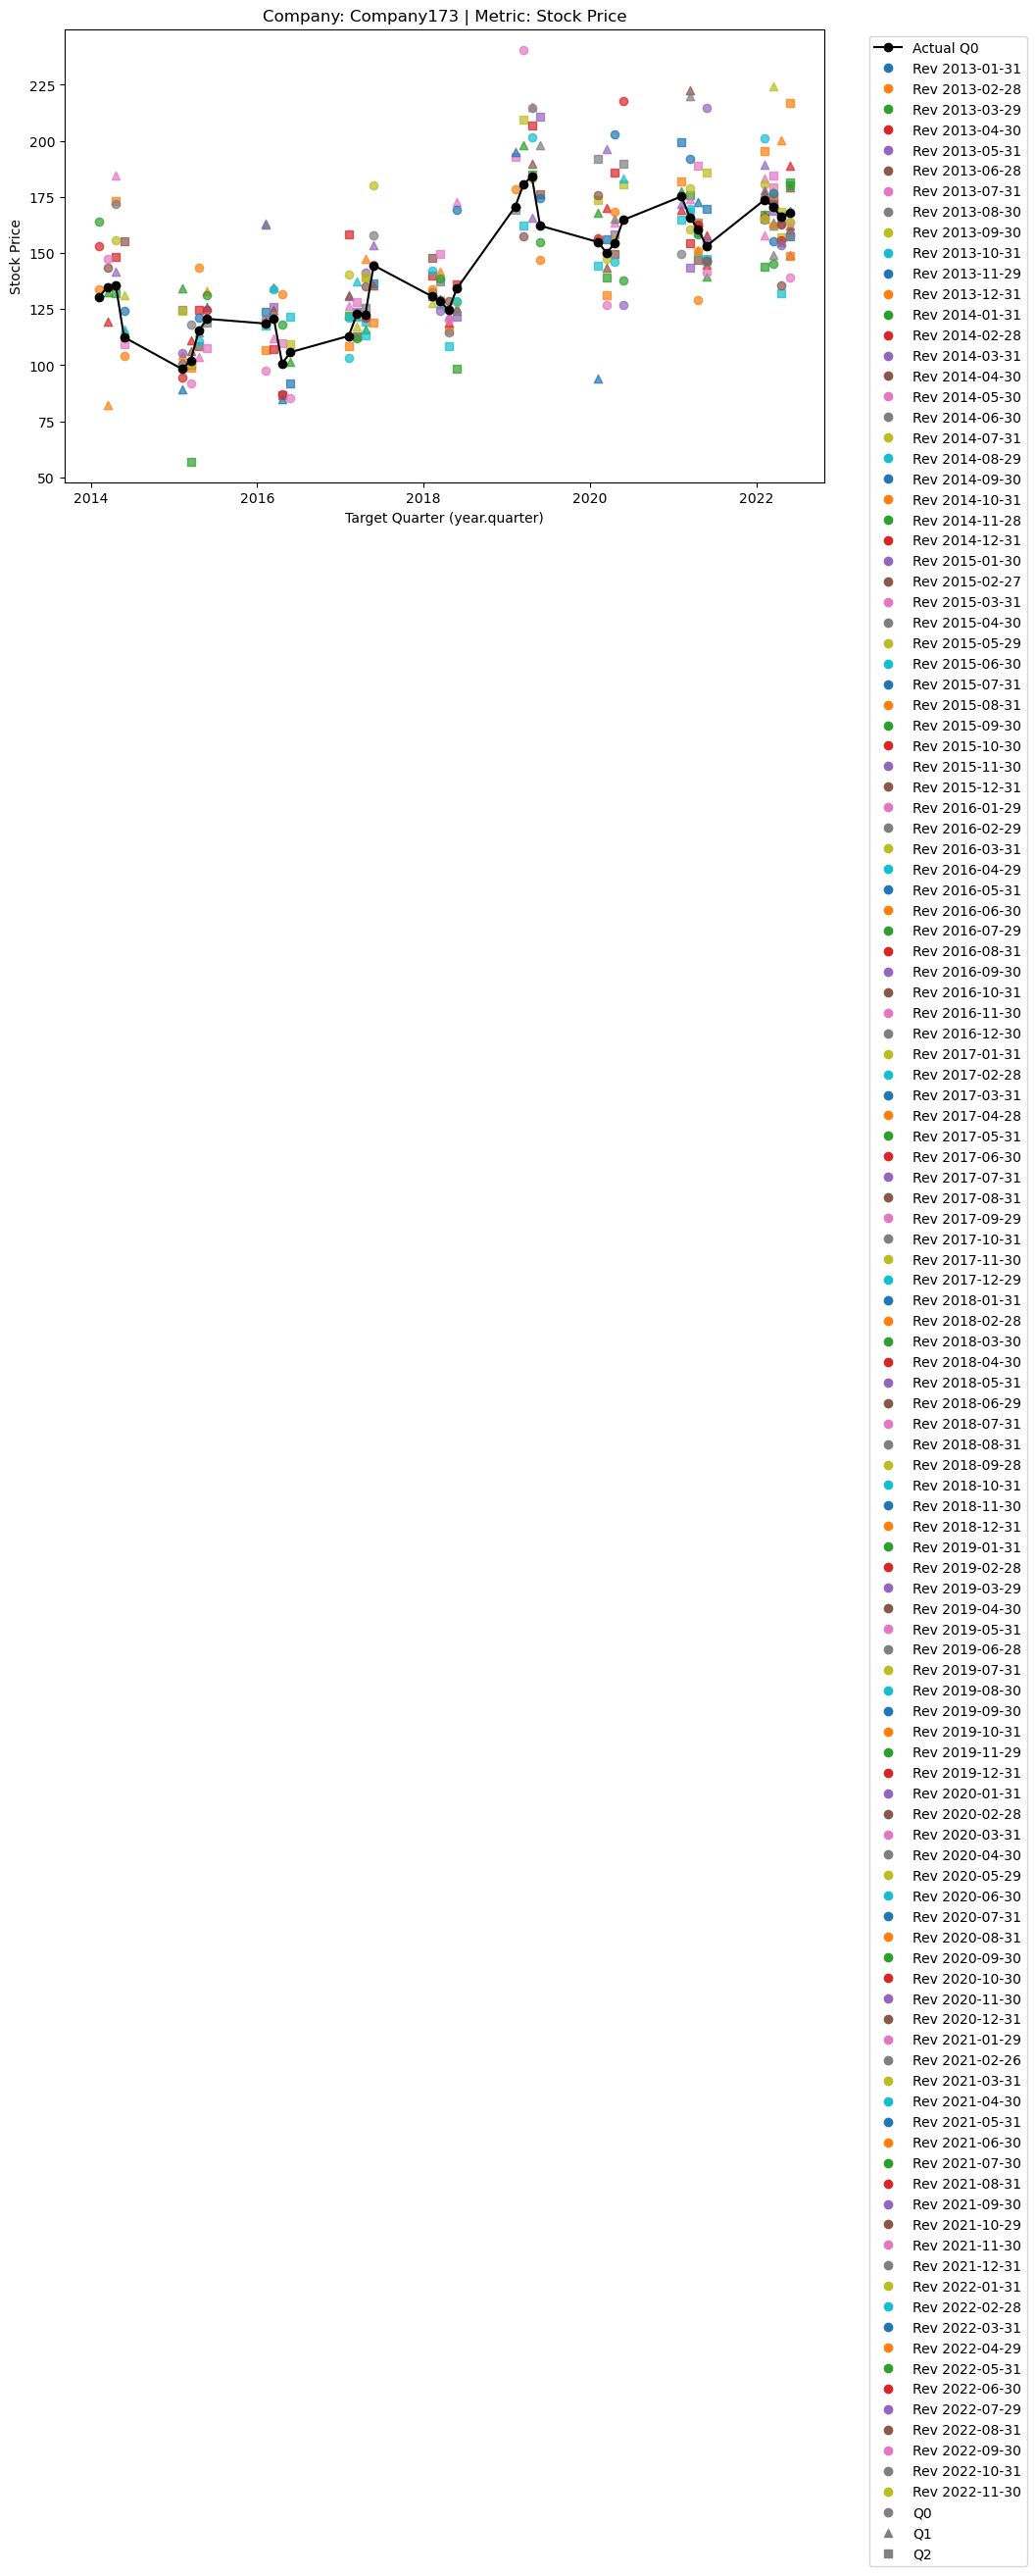

c:\Users\alexc\OneDrive\Escritorio\DWS Capstone Project\DWS-Capstone-Project\support_functions.py:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


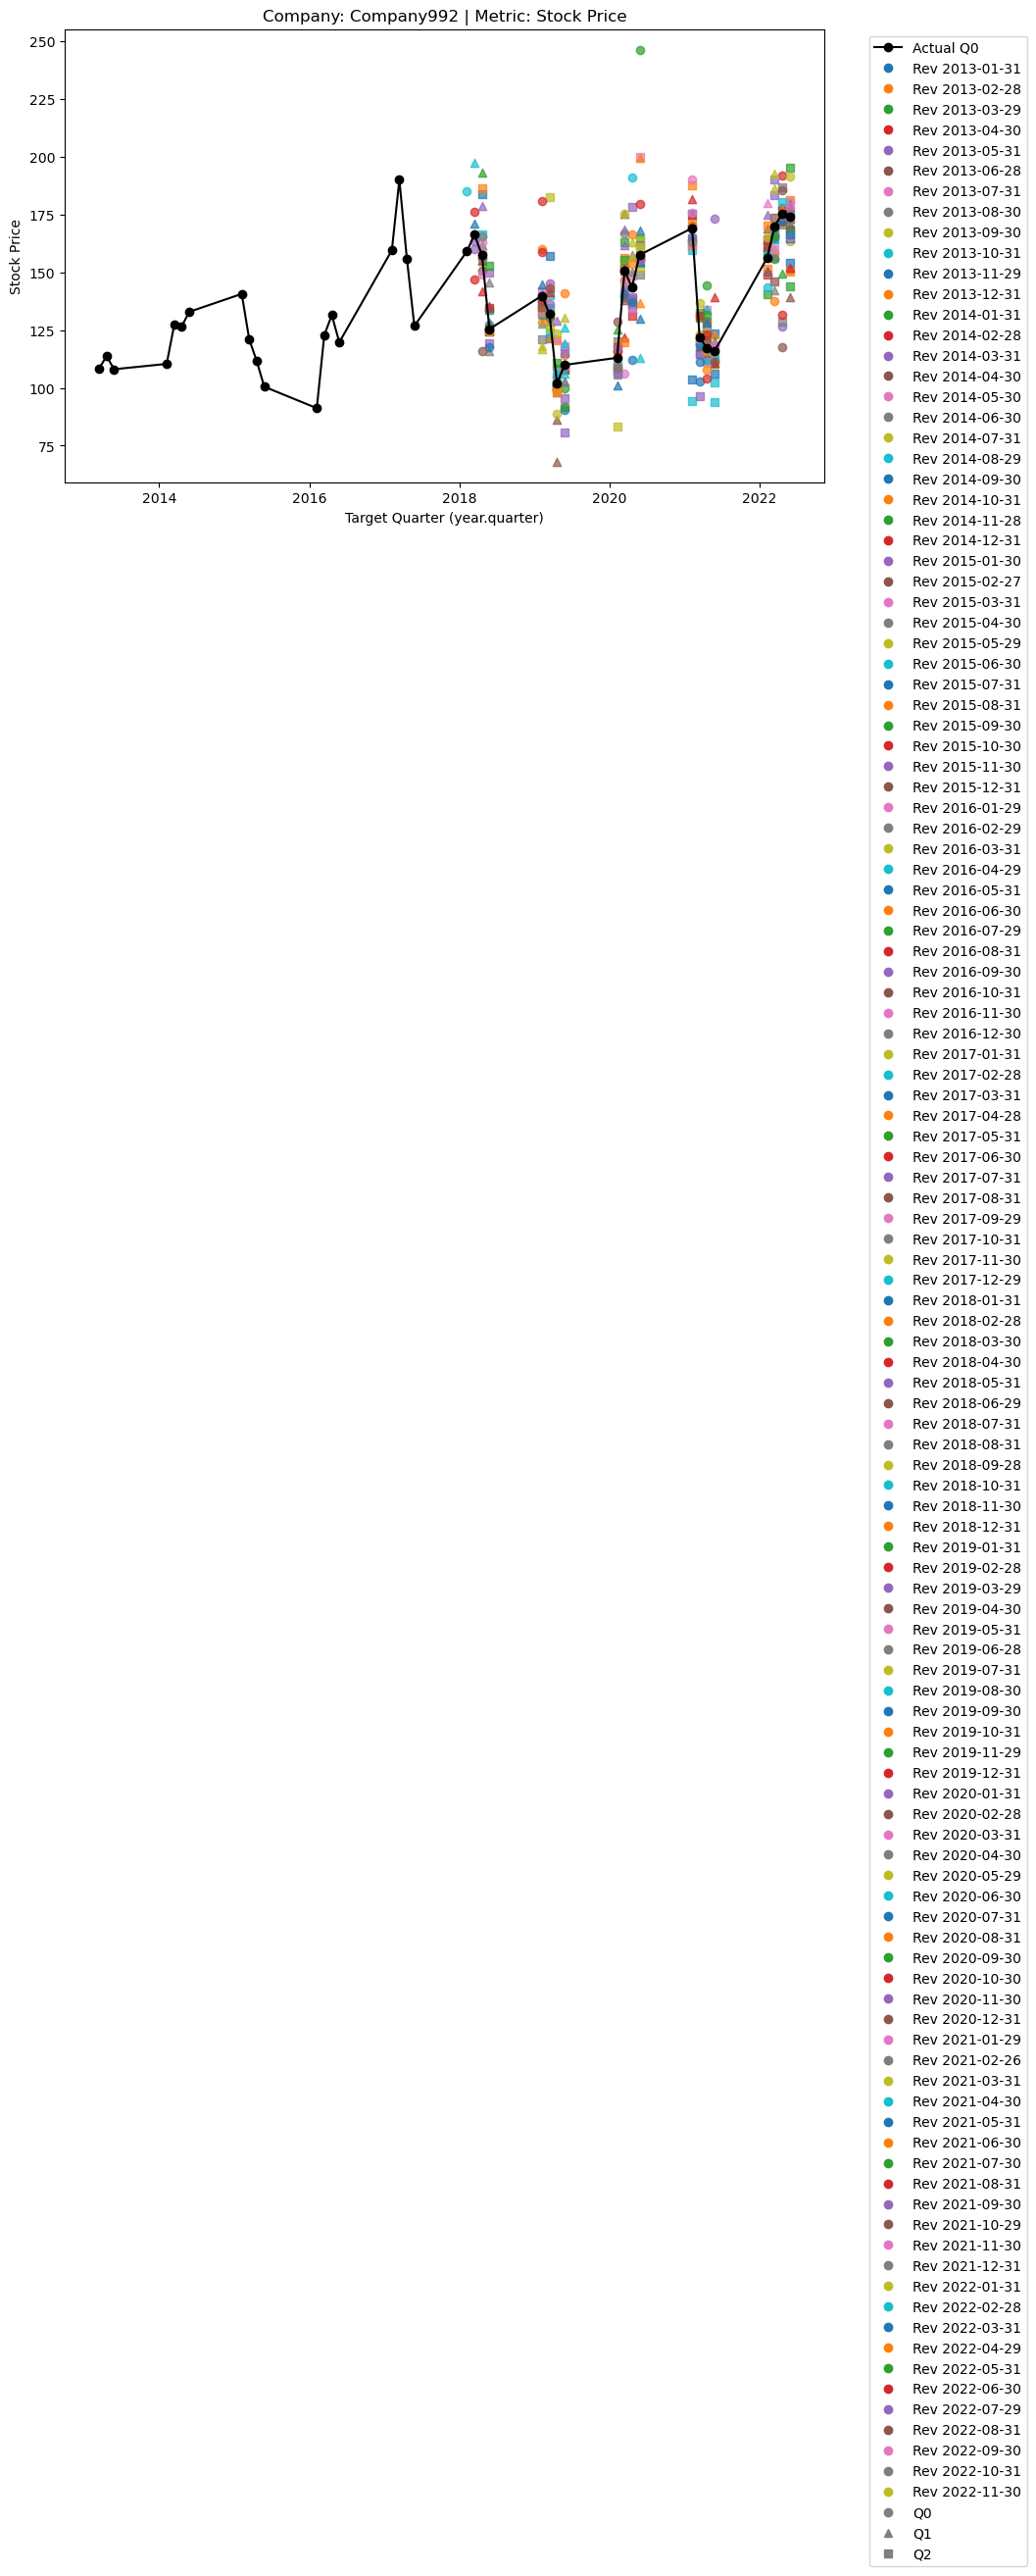

c:\Users\alexc\OneDrive\Escritorio\DWS Capstone Project\DWS-Capstone-Project\support_functions.py:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


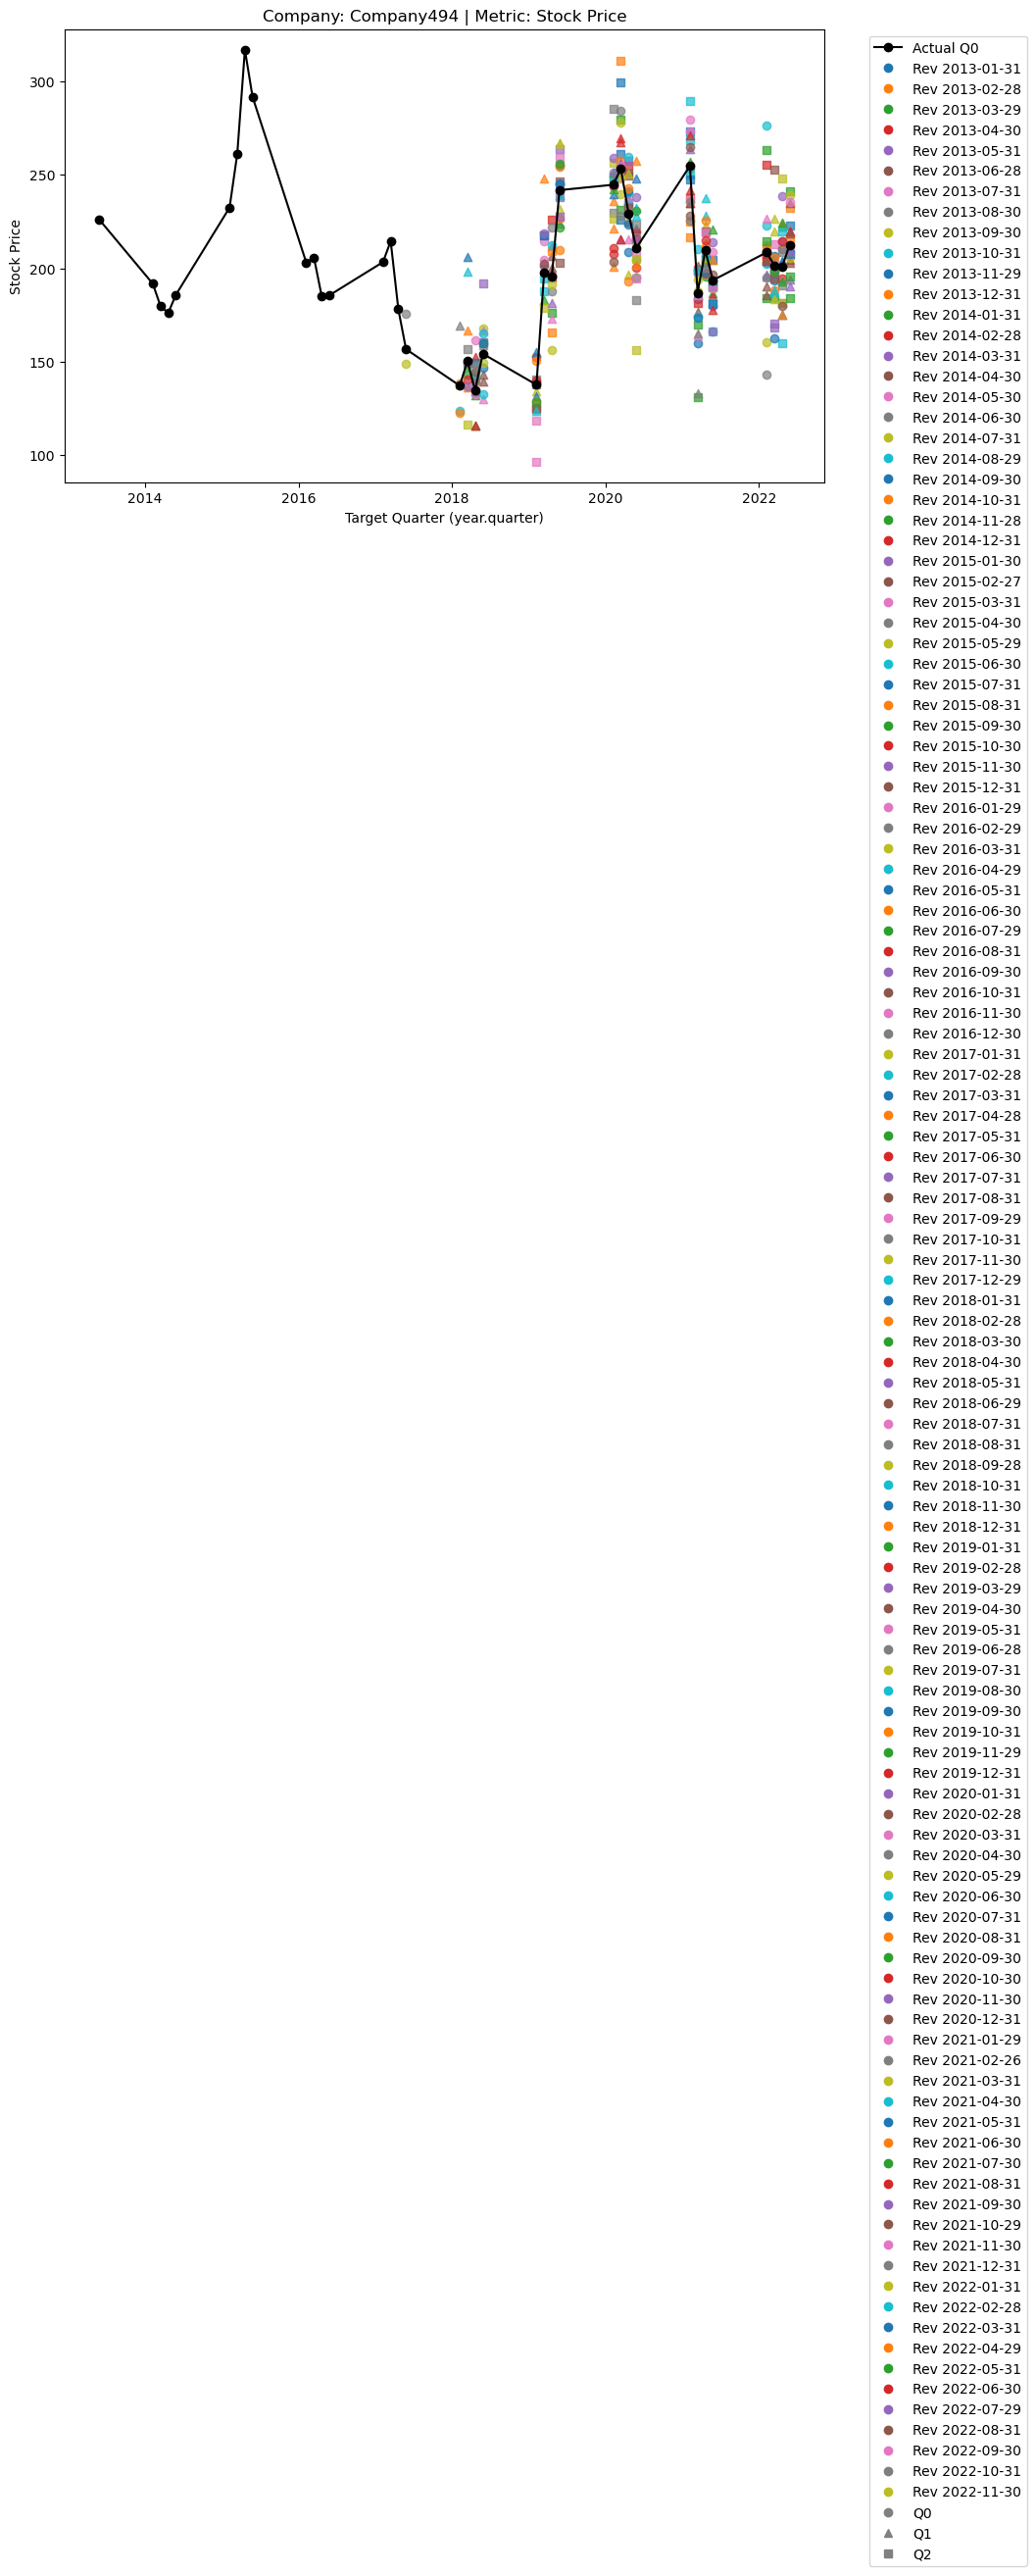

c:\Users\alexc\OneDrive\Escritorio\DWS Capstone Project\DWS-Capstone-Project\support_functions.py:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


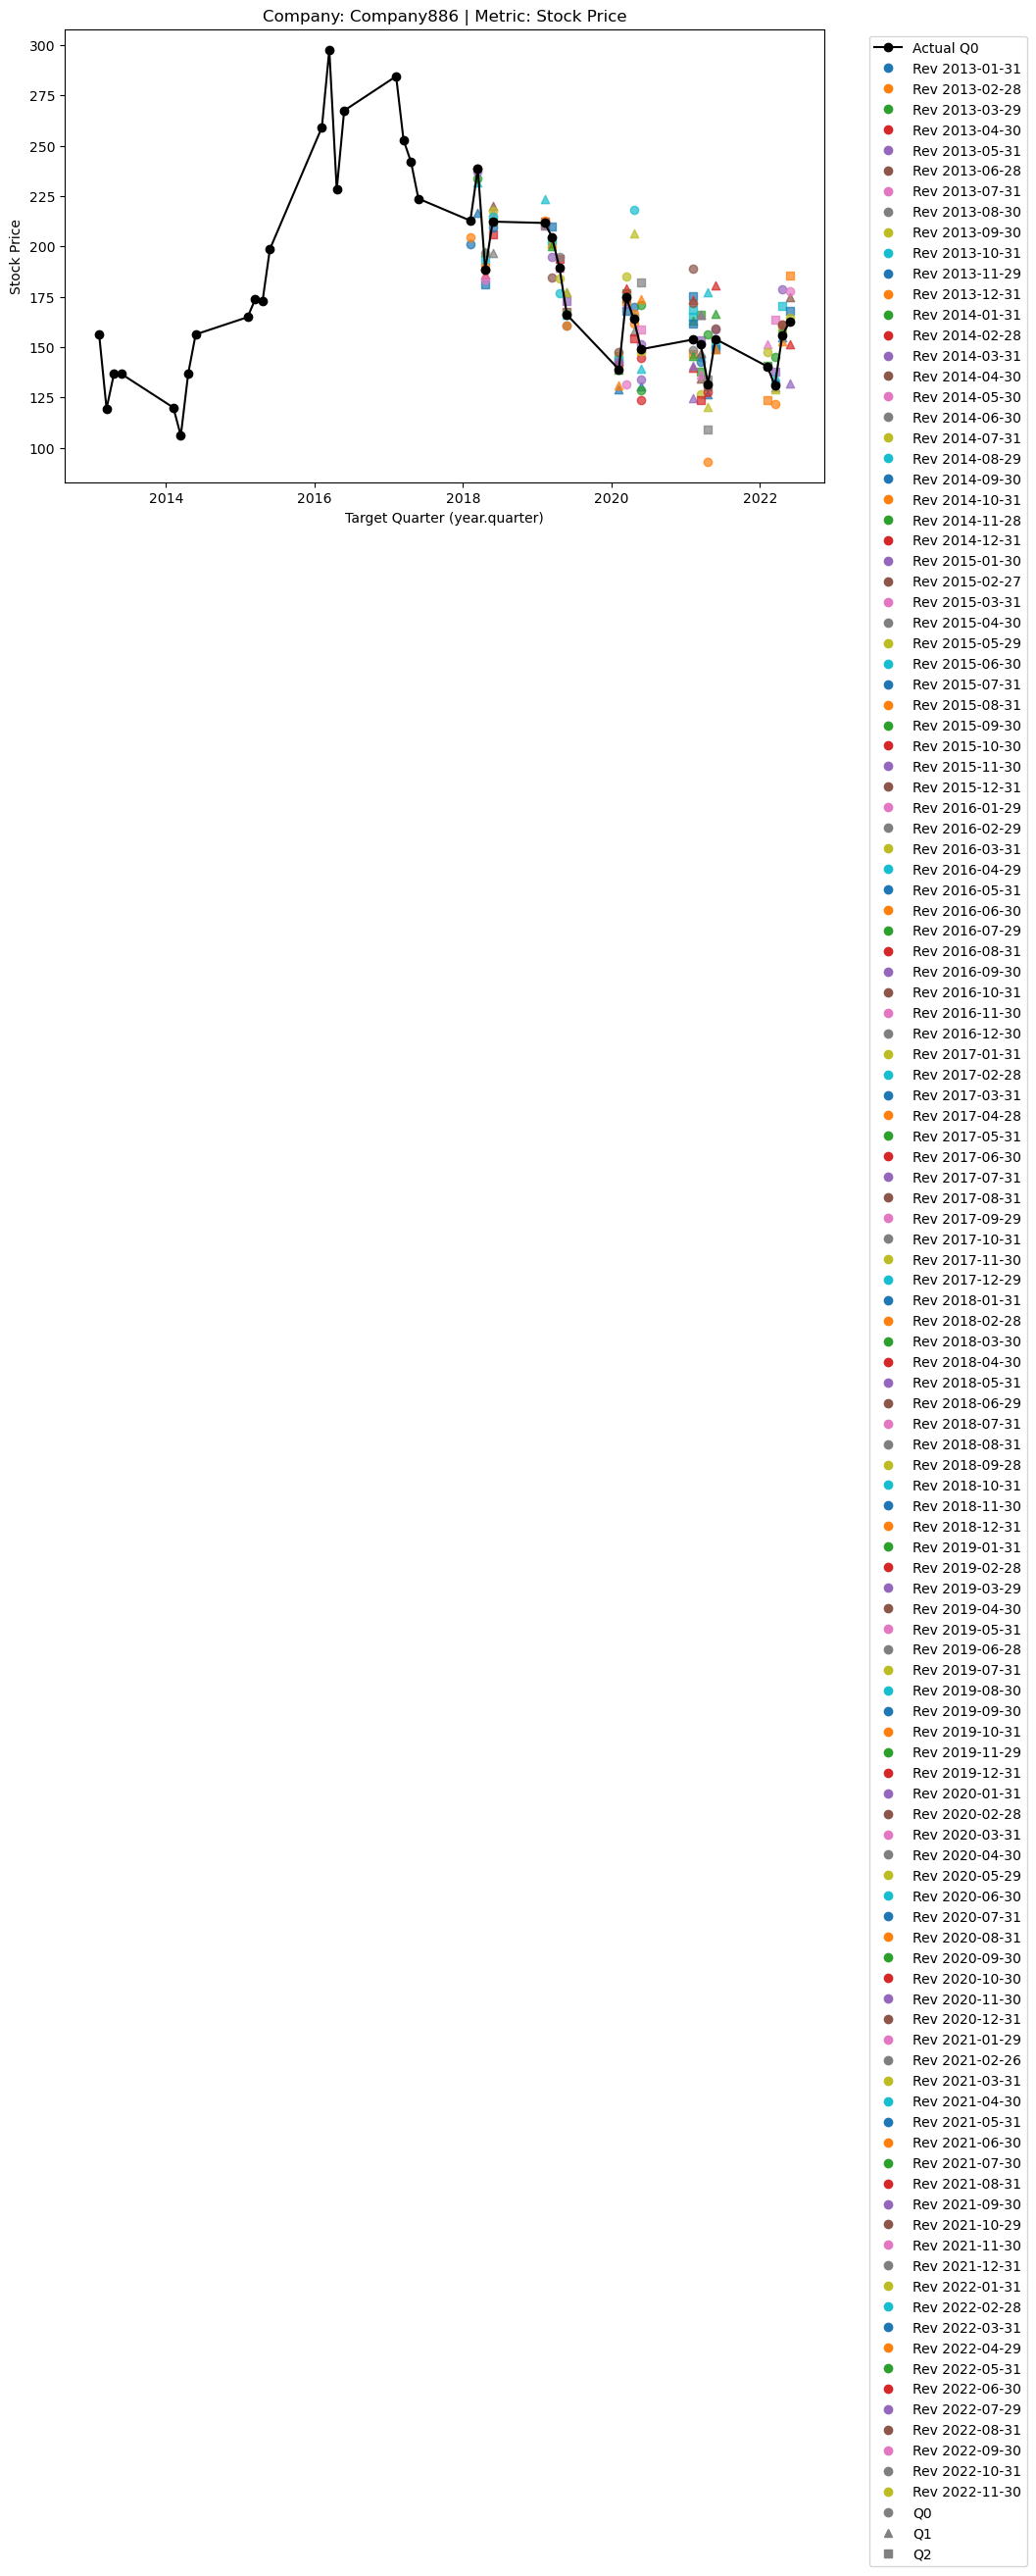

c:\Users\alexc\OneDrive\Escritorio\DWS Capstone Project\DWS-Capstone-Project\support_functions.py:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


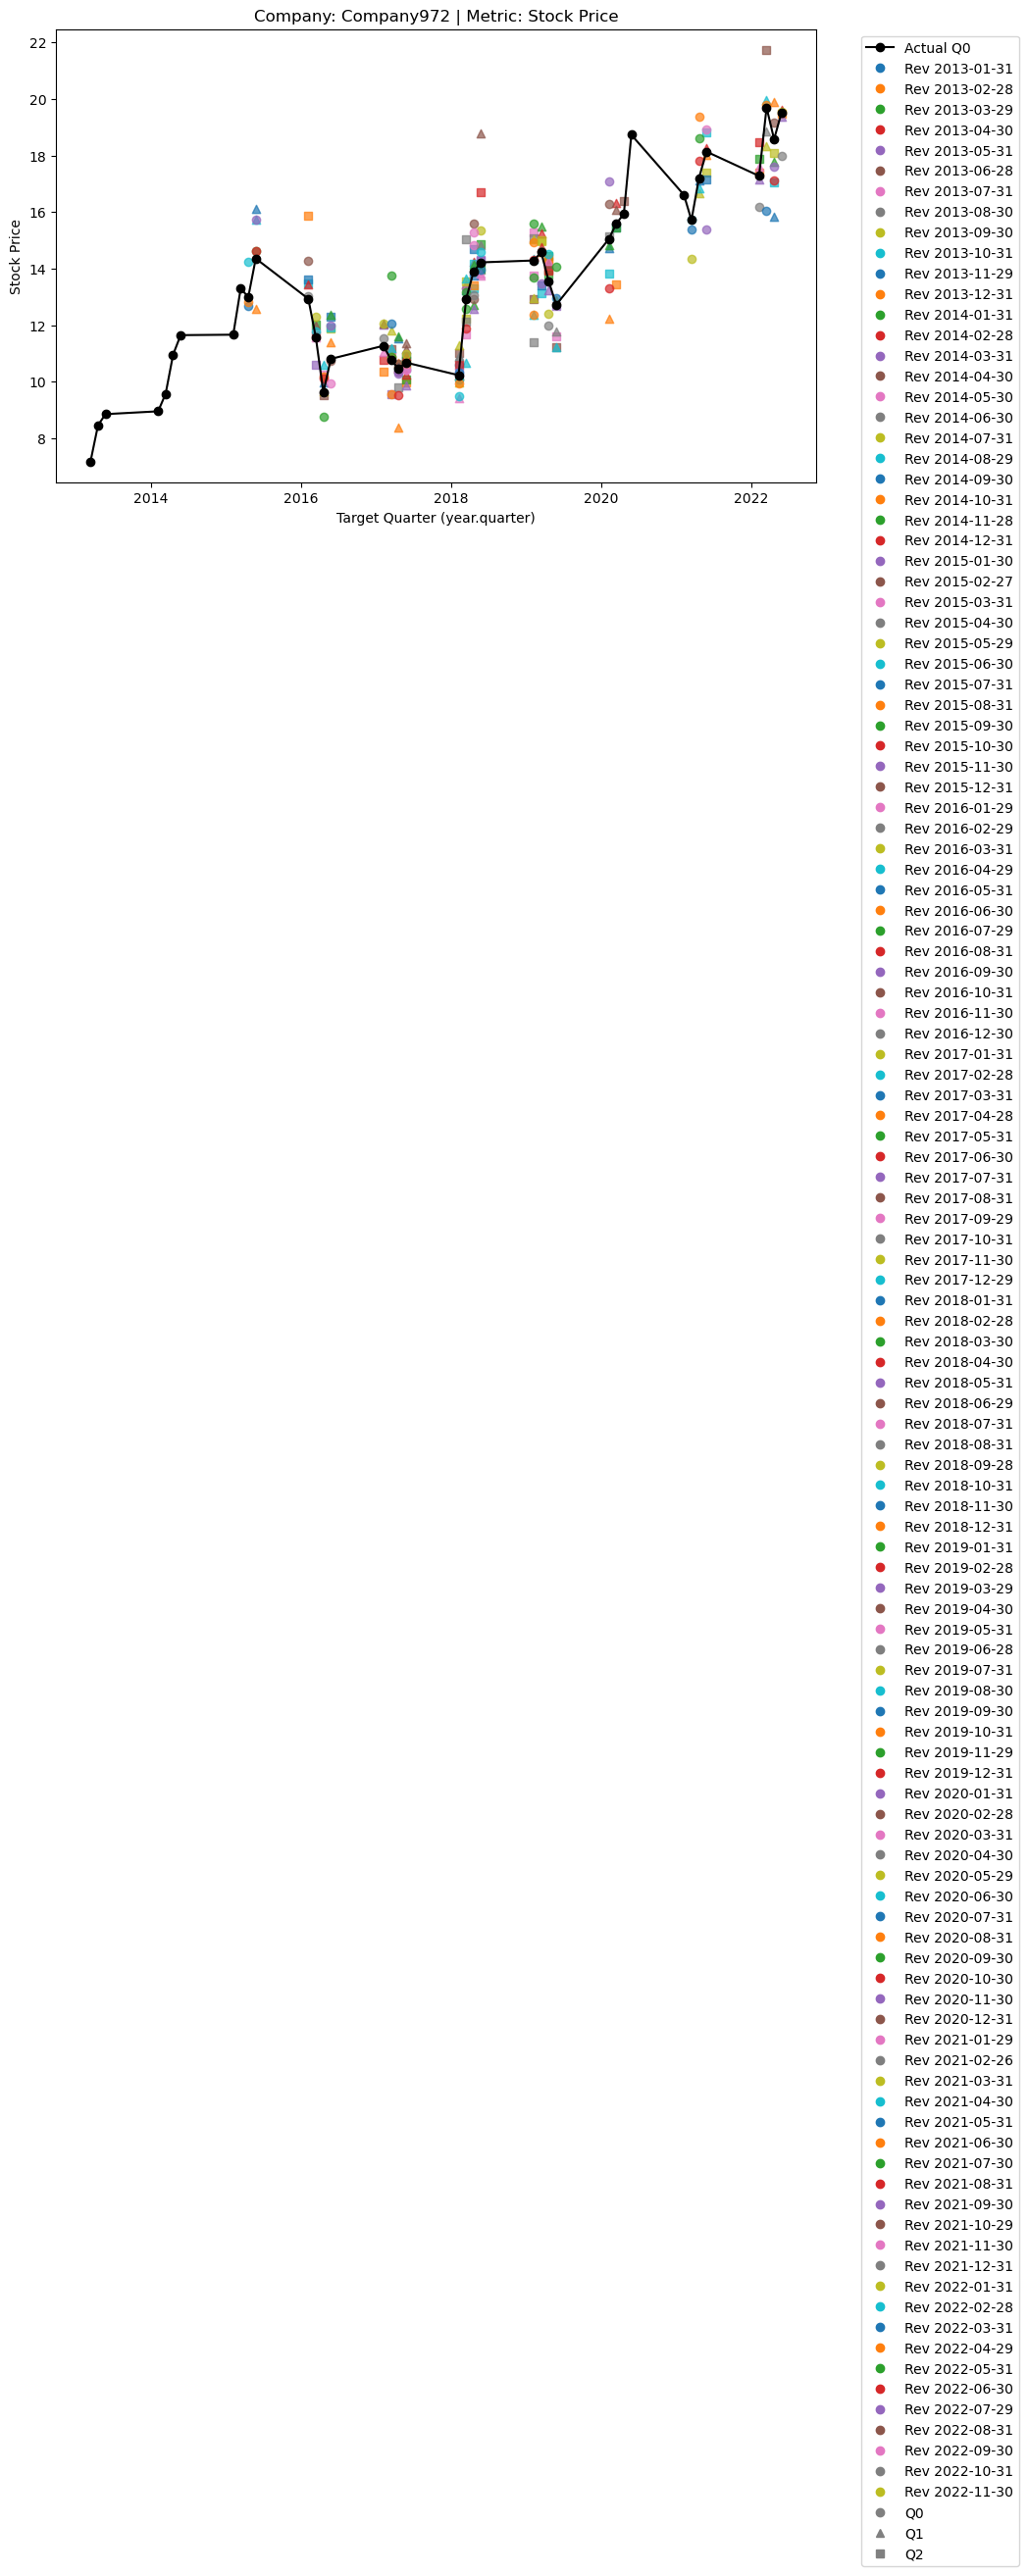

In [2]:
import pandas as pd
import support_functions as sf

# 1) rebuild your trading_days & quarter_ends as pandas Timestamps
start_date   = pd.Timestamp("2013-01-01")
end_date     = pd.Timestamp("2023-01-01")
trading_days = pd.date_range(start=start_date, end=end_date, freq="B")

quarter_ends = (
    trading_days
      .to_series()
      .groupby(trading_days.to_period("Q"))
      .last()
      .tolist()            # <-- keep them as pd.Timestamp
)

# 2) now inject the map into the module
sf._quarter_ends_map = {
    f"Q{ts.quarter} {ts.year}": ts
    for ts in quarter_ends
}

# 3) call the function normally
sf.visualize_random_companies(
    df,
    metric="Stock Price",
    m=5,
    n=3,
    random_state=42
)